In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('D:/Dixant/CDAC/Machine Learning/29-12-21/Train.csv')

In [4]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean() # reduce rows
df.drop(['ID'], axis = 1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   762 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [8]:
df.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


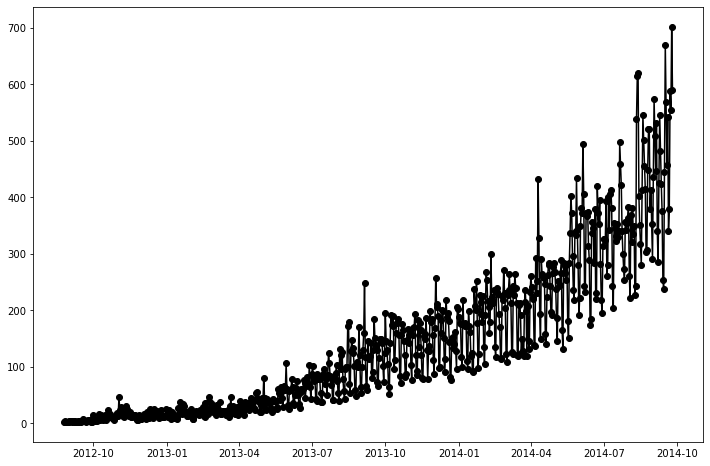

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df, marker="o", color="black",label='Oringinal data')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Count'])
test_result

(2.9863509590138575,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

In [11]:
df['Count']=df['Count']-df['Count'].shift(1)
test_result=adfuller(df['Count'].dropna())
test_result

(-7.964456375750484,
 2.8899109122457937e-12,
 20,
 740,
 {'1%': -3.4392177416762086,
  '5%': -2.8654536415414684,
  '10%': -2.5688540485756026},
 7202.092026075822)

In [12]:
df=df.dropna()

In [13]:
df

,Count
Datetime,
2012-08-26,0.500000
2012-08-27,-1.083333
2012-08-28,-0.166667
2012-08-29,0.083333
2012-08-30,0.583333
...,...
2014-09-21,38.166667
2014-09-22,208.916667
2014-09-23,-33.833333


In [14]:
import statsmodels.api as sm

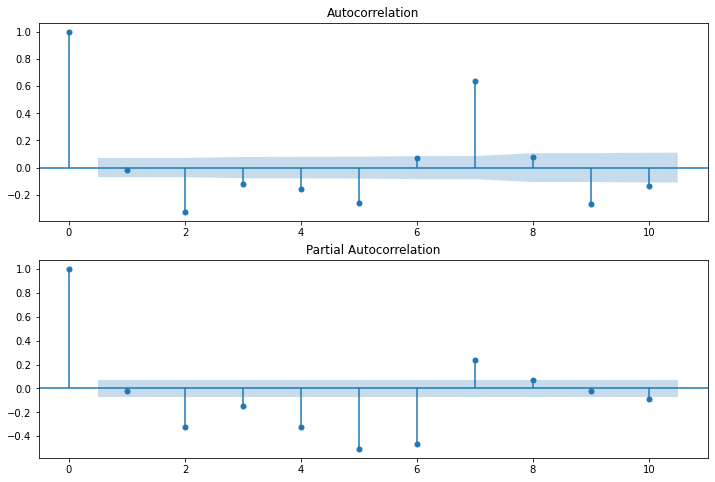

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Count'].dropna(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Count'].dropna(), lags=10, ax=ax2)

In [16]:
from statsmodels.tsa.arima_model import ARMA
# fit model
ARMAmodel = ARMA(df['Count'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

In [17]:
df

,Count
Datetime,
2012-08-26,0.500000
2012-08-27,-1.083333
2012-08-28,-0.166667
2012-08-29,0.083333
2012-08-30,0.583333
...,...
2014-09-21,38.166667
2014-09-22,208.916667
2014-09-23,-33.833333


In [18]:
df['Count']

Datetime
2012-08-26      0.500000
2012-08-27     -1.083333
2012-08-28     -0.166667
2012-08-29      0.083333
2012-08-30      0.583333
                 ...    
2014-09-21     38.166667
2014-09-22    208.916667
2014-09-23    -33.833333
2014-09-24    148.000000
2014-09-25   -112.666667
Freq: D, Name: Count, Length: 761, dtype: float64

In [19]:
actuals = df['Count'][750:]
actuals

Datetime
2014-09-15    207.166667
2014-09-16    224.666667
2014-09-17   -100.166667
2014-09-18   -111.500000
2014-09-19     84.750000
2014-09-20   -202.000000
2014-09-21     38.166667
2014-09-22    208.916667
2014-09-23    -33.833333
2014-09-24    148.000000
2014-09-25   -112.666667
Freq: D, Name: Count, dtype: float64

In [20]:
ypredicted = ARmodel_fit.predict(750,760) 
print(ypredicted)

Datetime
2014-09-15     89.000866
2014-09-16    -17.966918
2014-09-17   -128.966693
2014-09-18    -72.966303
2014-09-19    -13.771224
2014-09-20    -55.124516
2014-09-21     48.453862
2014-09-22     27.614535
2014-09-23    -77.528245
2014-09-24    -56.895238
2014-09-25   -127.920292
Freq: D, dtype: float64


In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)

MAE: 102.632993


In [22]:
import itertools
i = j = range(0, 6)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(df['Count'],order=parameters)
        results = mod.fit()
        ypredicted = results.predict(750,760) # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - MAE:133.7329669892088
ARMA(0, 1) - MAE:129.6981075009097
ARMA(0, 2) - MAE:94.7179955869398
ARMA(0, 3) - MAE:94.8701949032547
ARMA(0, 4) - MAE:98.2285961562207
ARMA(1, 0) - MAE:132.48256167211477
ARMA(1, 1) - MAE:102.63299257367584
ARMA(1, 2) - MAE:94.82216612513959
ARMA(1, 3) - MAE:94.97555619443825
ARMA(1, 4) - MAE:91.68812839199285
ARMA(1, 5) - MAE:89.88055535215409
ARMA(2, 0) - MAE:118.1364741024313
ARMA(2, 1) - MAE:93.59075268225797
ARMA(2, 2) - MAE:90.71850746969834


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARMA(2, 3) - MAE:70.13075429607001


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARMA(2, 4) - MAE:77.2841677897129


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARMA(2, 5) - MAE:69.60614509692458
ARMA(3, 0) - MAE:114.55150423121336
ARMA(3, 1) - MAE:94.05455888743509
ARMA(3, 2) - MAE:89.94105942361458
ARMA(3, 3) - MAE:87.43544805689046


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(3, 4) - MAE:68.54569587523396
ARMA(4, 0) - MAE:92.00933811710641
ARMA(4, 1) - MAE:80.1442209198482


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(4, 3) - MAE:74.4586324641819


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARMA(4, 4) - MAE:69.84313813243165
ARMA(5, 0) - MAE:89.6070510494992
ARMA(5, 1) - MAE:84.18488354404704


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(5, 2) - MAE:76.8825623345573


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(5, 3) - MAE:78.10583460103929
ARMA(5, 5) - MAE:69.23148802121182


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [25]:
ARMAmodel = ARMA(df['Count'], order=(3, 4))
ARmodel_fit = ARMAmodel.fit()
ypredicted = ARmodel_fit.predict(750,760)
print(ypredicted)
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARmodel_fit.aic)

Datetime
2014-09-15    145.987157
2014-09-16     68.127749
2014-09-17    -93.958923
2014-09-18    -90.861389
2014-09-19    -62.181410
2014-09-20   -153.199597
2014-09-21    -11.886454
2014-09-22     96.786714
2014-09-23    -18.087029
2014-09-24     15.373252
2014-09-25   -115.816598
Freq: D, dtype: float64
MAE: 68.545696
7606.111525839866


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
